In [1]:
from operations import *

%matplotlib inline

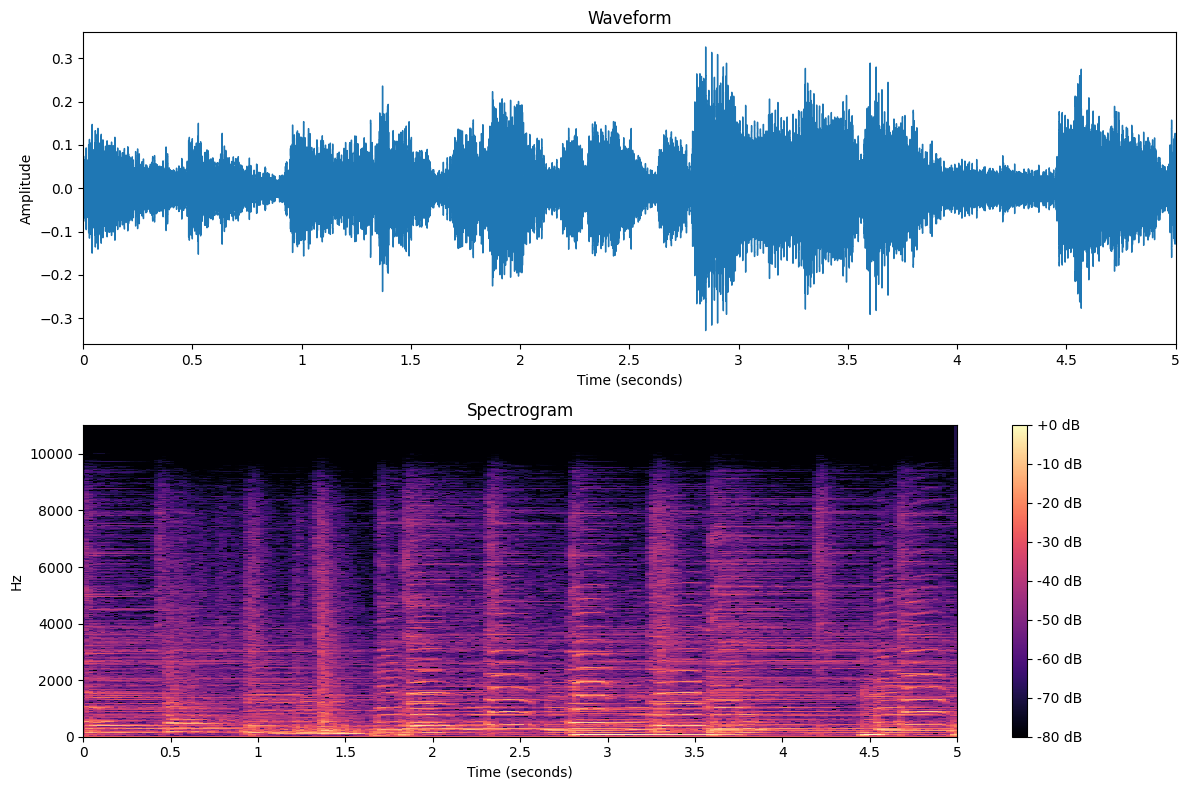

In [2]:
fn_wav = os.path.join('./data/GTZAN-jazz/', 'jazz.00048.wav')
audio_obj = plot_wav_spectrogram(fn_wav, xlim=(0,5), audio=True)
audio_obj

## Onset Detection

In [3]:
x, Fs = librosa.load(fn_wav, duration=4)
nov, Fs_nov = compute_novelty_spectrum(x, Fs=Fs, N=1024, H=256, gamma=10.0, M=10, norm=True)

fn_ann = os.path.join('./data/gtzan_beats/', 'gtzan_jazz_00048.beats')

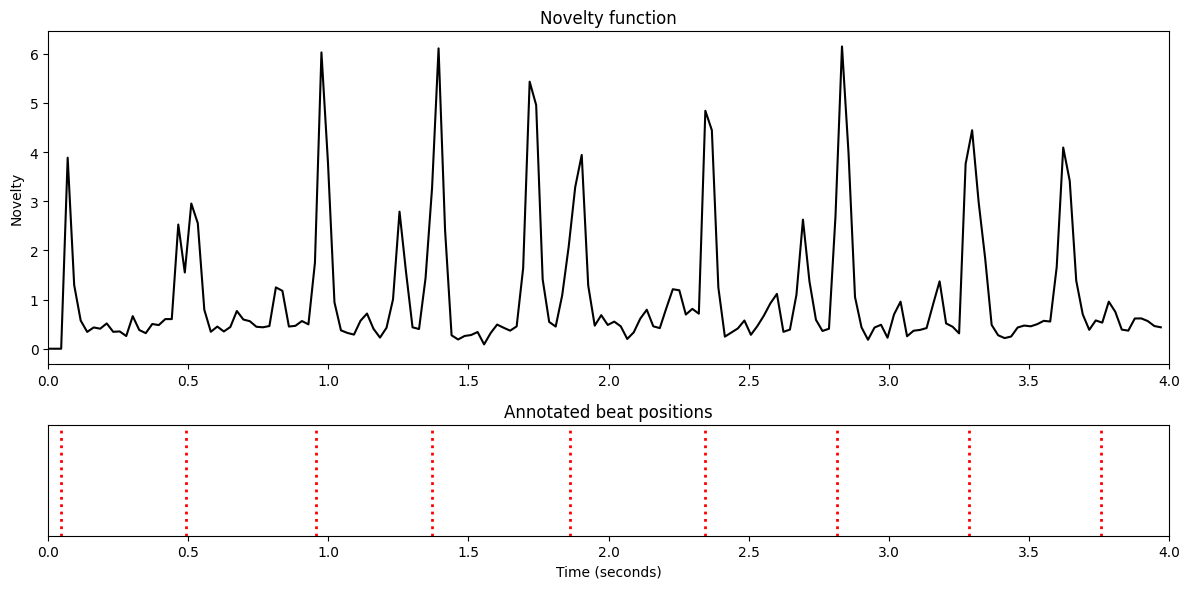

In [4]:
audio_obj = plot_novelty_and_beats(fn_wav, fn_ann, xlim=(0, 4), audio=True)
audio_obj

## Beat Tracking by Dynamic Programming

In [5]:
fn_ann = os.path.join('./data/gtzan_beats/', 'gtzan_jazz_00048.beats')
ann_df = read_annotation_pos(fn_ann)

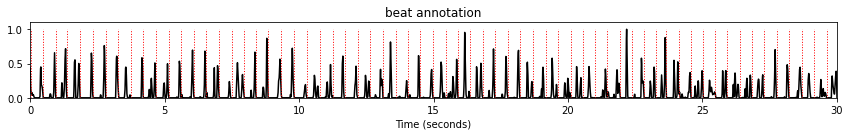

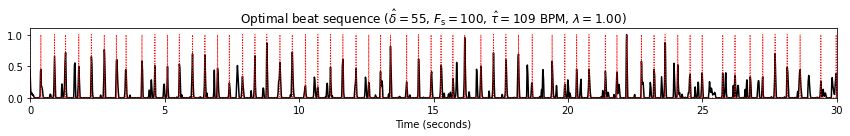

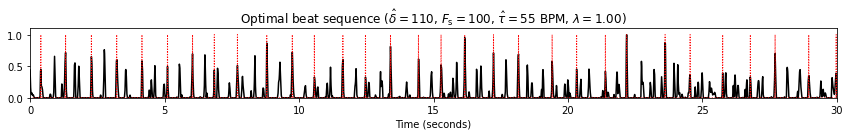

In [9]:
fn_wav = os.path.join('./data/GTZAN-jazz', 'jazz.00048.wav')
duration = None
x, Fs = librosa.load(fn_wav, duration=duration) 

nov, Fs_nov = compute_novelty_spectrum(x, Fs=Fs, N=2048, H=512, gamma=100, M=10, norm=True)
nov, Fs_nov = resample_signal(nov, Fs_in=Fs_nov, Fs_out=100)

beats_sec_ann = np.array(ann_df['time'].astype('float64'))
fig, ax, line = plot_signal(nov, Fs_nov, color='k', title="beat annotation", figsize=(12,2))
ax.vlines(beats_sec_ann, ymin=0, ymax=1, colors='r', linestyles=':', linewidth=1)
plt.show()
x_peaks = librosa.clicks(times=beats_sec_ann, sr=Fs, click_freq=1000, length=len(x))
ipd.display(ipd.Audio(x + x_peaks, rate=Fs))

beats_sec55 = compute_plot_sonify_beat(x, Fs, nov, Fs_nov, beat_ref=55, factor=1, figsize=(12,2))
beats_sec110 = compute_plot_sonify_beat(x, Fs, nov, Fs_nov, beat_ref=110, factor=1, figsize=(12,2))